# 02 &mdash; Probability Distribution Analysis

*(Data Analysis and Visualization 505067 &mdash; Final Report)*

**Authored by:** Nguyen Minh Triet

## Prerequisites

### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

sns.set(style="whitegrid")

### Loading data

In [2]:
df = pd.read_csv("../data/salaries.csv")

### Preprocessing

**Explanation:**

1. Drop duplicates with `df.drop_duplicates()`.

In [3]:
df = df.drop_duplicates()
df.shape

(27311, 11)

## Plots

### Histogram + KDE plot

**Explanation:**

Visualize distribution to confirm skewness and identify extreme values.

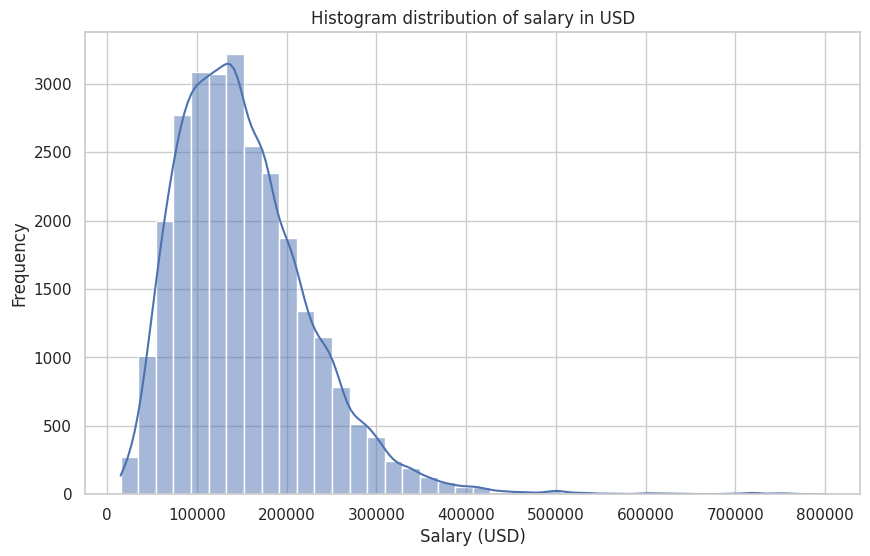

In [4]:
plt.figure(figsize=(10, 6))

sns.histplot(df["salary_in_usd"], bins=40, kde=True)

plt.title("Histogram distribution of salary in USD")

plt.xlabel("Salary (USD)")
plt.ylabel("Frequency")

plt.show()

**Summary:**

* Bell curve shape present, typical of normal distribution.
* Salary is right-skewed: central mass is ~150,000 USD, while right tail extends up to 800,000 USD.

$\Rightarrow$ Salary is suggested to follow a **log-normal** distribution.

### Q-Q plot

**Explanation:**

Q-Q plot compares quantiles of our observed data with a theoretical normal distribution.

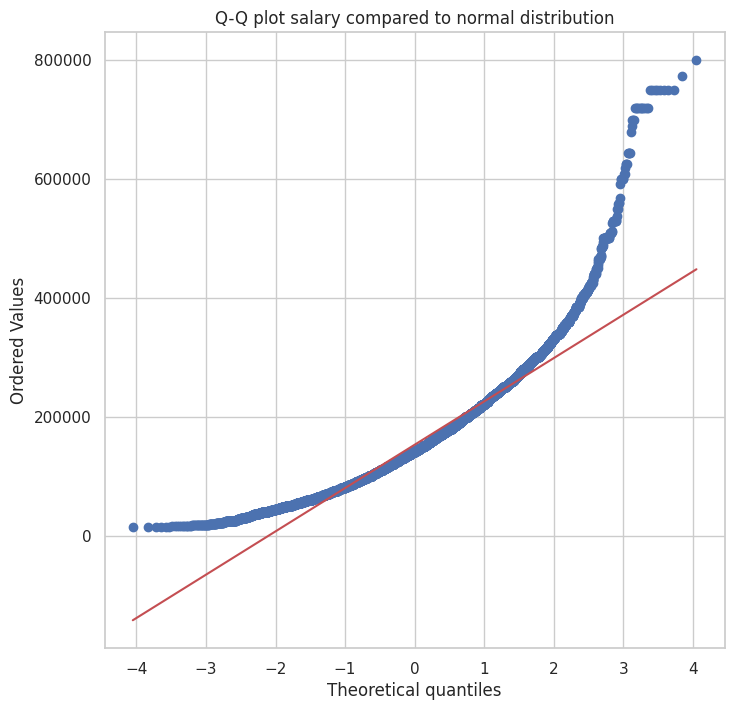

In [5]:
plt.figure(figsize=(8, 8))

stats.probplot(df["salary_in_usd"], dist="norm", plot=plt)

plt.title("Q-Q plot salary compared to normal distribution")

plt.show()

**Summary:**

Data points curve upwards, especially in the right tail.

## Shapiro–Wilk and Kolmogorov–Smirnov tests

**Explanation:**

* Shapiro–Wilk Test compares sorted data points to those expected under normality.
* Kolmogorov–Smirnov Test compares empirical cumulative distribution function (ECDF) of our data to a theoretical CDF of a normal distribution.

We reject normality if all tests' $\text{p–value} < 0.05$.

In [6]:
sample = df["salary_in_usd"].sample(3_000, random_state=42)

shapiro_stat, shapiro_p = stats.shapiro(sample)
print("Shapiro–Wilk test p-value =", shapiro_p)

scaled = (sample - sample.mean()) / sample.std()
kstest_stat, kstest_p = stats.kstest(scaled, 'norm')
print("Kolmogorov–Smirnov test p-value =", kstest_p)

Shapiro–Wilk test p-value = 3.811588354422095e-37
Kolmogorov–Smirnov test p-value = 2.355048740125661e-11


**Summary:**

* $\text{p–value} \ll 0.05 \Rightarrow$ We reject normality.
* Confirms need for robust measures or transformation.

## Log-transformation

**Explanation:**

Log-transform reduces skew, making distribution approximately symmetric.

$$\text{salary'} = \ln(\text{salary})$$

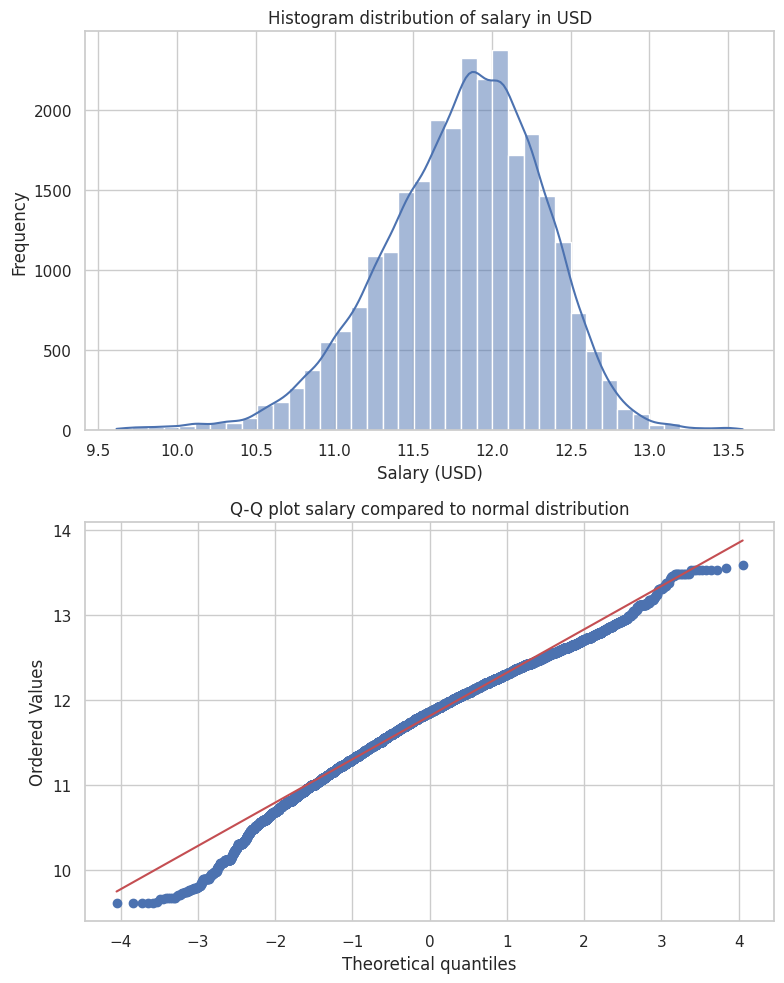

In [7]:
log_salary = np.log1p(df["salary_in_usd"])

fig, axes = plt.subplots(2, 1, figsize=(8, 10))

sns.histplot(log_salary, bins=40, kde=True, ax=axes[0])

axes[0].set_title("Histogram distribution of salary in USD")

axes[0].set_xlabel("Salary (USD)")
axes[0].set_ylabel("Frequency")

stats.probplot(log_salary, dist="norm", plot=axes[1])

axes[1].set_title("Q-Q plot salary compared to normal distribution")

plt.tight_layout()

plt.show()

**Summary:**

* Histogram of ln(salary) aligns better with normal.
* Q-Q plot of log-transformed salary shows near-linear trend.

**Note:**

Log-transform should be applied before outlier removal to preserve symmetry.

## Conclusion

* Salary follows a log-normal distribution with a right skew.
* Log-transformation improves symmetry and reduces the skew.
* Median and IQR are more reliable than mean and standard deviation for describing salary.